### Multi-layer Perceptron Exercise
#### In this exercise, we will implement the multi-perceptron algorithm with two hidden layers. 
#### The implementation of the MLP algorithm will be in the mlp.py file but you will test your implementation 
#### in this notebook. In this exercise we will use the MNIST dataset that we used for week 2 lab (KNN). 

In [14]:
# importing the MLP algorithm from mlp.py file 
# where you will implement the MLP algorithm 
from mlp import MLP 
import numpy as np

# This is to reload all changed modules every time before executing a new line.
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# loading the MNIST datatset
import pickle, gzip

f = gzip.open('mnist.pkl.gz','rb')
tset, vset, teset = pickle.load(f, encoding='latin1')
print(tset[0].shape, vset[0].shape, teset[0].shape)
f.close()

(50000, 784) (10000, 784) (10000, 784)


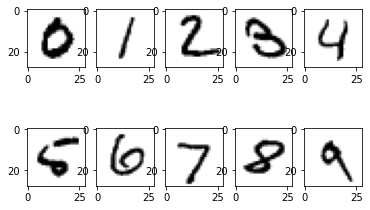

In [16]:
import matplotlib.pyplot as plt # To install: pip install matplotlib

# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(teset[1] == i)[0]
    plottable_image = np.reshape(teset[0][im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [17]:
# we will use only 9000 images for training and 1000 for testing 

# Just use the first 9000 images for training 
tread = 9000
train_in = tset[0][:tread,:]

# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((tread,10))
for i in range(tread):
    train_tgt[i,tset[1][i]] = 1

# and use 1000 images for testing
teread = 1000
test_in = teset[0][:teread,:]
test_tgt = np.zeros((teread,10))
for i in range(teread):
    test_tgt[i,teset[1][i]] = 1

#### Initialise the MLP classifier 

In [18]:
# We choose the first and second hidden layers to have 5 neurons each.
sizes = [784,5,5,10] # 784 is the number of pixels of the images and 10 is the number of classes 
classifier = MLP(sizes)

In [19]:
# TODO: open the mlp.py file and implement self.forwardPass and self.train methods
# test your implementation here 
# for now, let's keep the learning rate and the number of iterations unchanged  
classifier.train(train_in, train_tgt, 0.1, 1000)

Iteration:  0  Error:  4072.1466920701305
Iteration:  100  Error:  8226.0
Iteration:  200  Error:  8226.0
Iteration:  300  Error:  8226.0
Iteration:  400  Error:  8226.0
Iteration:  500  Error:  8226.0
Iteration:  600  Error:  8226.0
Iteration:  700  Error:  8226.0
Iteration:  800  Error:  8226.0
Iteration:  900  Error:  8226.0


In [20]:
# we evaluate our model on the testing set 
# and show the confusion matrix and the accuracy
classifier.evaluate(test_in, test_tgt)

The confusion matrix is:
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 85. 126. 116. 107. 110.  87.  87.  99.  89.  94.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
The accuracy is  8.7


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 85., 126., 116., 107., 110.,  87.,  87.,  99.,  89.,  94.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [21]:
# you should expect the accuracy to be really low ~ most likely less than %50
# I think we can do better by experimenting with different learning rate and 
# number of neurons in each hidden layer. 

In [22]:
# TODO: modify the network parameters to get the test accuracy above %90 
# you can change the learning rate, the number of neurons of each hidden layer
# and number of iterations. You can also implement the gradient descent algorithm
# with momentum and experiment it with different momentum values. 

In [43]:
best_sizes = [784,50,16,10]
best_beta = 2
best_momentum = 0.1
best_lr = 0.001 # best learning rate
best_niterations = 1500
best_classifier = MLP(sizes = best_sizes, beta=best_beta, momentum=best_momentum)
best_classifier.train(train_in, train_tgt, best_lr, best_niterations)
best_classifier.evaluate(test_in, test_tgt)

Iteration:  0  Error:  4078.287244503409
Iteration:  100  Error:  900.4285365958879
Iteration:  200  Error:  445.7336915057391
Iteration:  300  Error:  282.5029735408545
Iteration:  400  Error:  209.64630556637775
Iteration:  500  Error:  611.9283029885353
Iteration:  600  Error:  167.12888932870774
Iteration:  700  Error:  123.80357762550955
Iteration:  800  Error:  104.42599625614672
Iteration:  900  Error:  91.81303773231278
Iteration:  1000  Error:  84.59370657842359
Iteration:  1100  Error:  78.66605777250153
Iteration:  1200  Error:  71.42645695756998
Iteration:  1300  Error:  63.49424466390861
Iteration:  1400  Error:  59.368834504447584
The confusion matrix is:
[[ 80.   0.   0.   0.   0.   1.   3.   0.   0.   0.]
 [  0. 124.   0.   0.   0.   0.   0.   1.   0.   0.]
 [  1.   1. 113.   2.   3.   0.   2.   3.   5.   0.]
 [  0.   0.   0.  98.   0.   7.   0.   2.   0.   1.]
 [  0.   0.   1.   0. 100.   0.   1.   1.   1.   0.]
 [  2.   0.   0.   4.   0.  75.   1.   0.   0.   2.]
 [  

array([[ 80.,   0.,   0.,   0.,   0.,   1.,   3.,   0.,   0.,   0.],
       [  0., 124.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.],
       [  1.,   1., 113.,   2.,   3.,   0.,   2.,   3.,   5.,   0.],
       [  0.,   0.,   0.,  98.,   0.,   7.,   0.,   2.,   0.,   1.],
       [  0.,   0.,   1.,   0., 100.,   0.,   1.,   1.,   1.,   0.],
       [  2.,   0.,   0.,   4.,   0.,  75.,   1.,   0.,   0.,   2.],
       [  1.,   0.,   0.,   0.,   1.,   1.,  80.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   1.,   0.,   0.,   0.,  90.,   1.,   1.],
       [  1.,   1.,   1.,   2.,   0.,   2.,   0.,   0.,  78.,   3.],
       [  0.,   0.,   0.,   0.,   6.,   1.,   0.,   2.,   4.,  87.]])

In [44]:
# TODO: run the following code to save the best parameters and 
# the weights of the network that achieves the desired accuracy
best_parameters = {
    'sizes': best_sizes,
    'beta': best_beta,
    'momentum': best_momentum,
    'lr': best_lr,
    'niterations': best_niterations,
    'weights_1': best_classifier.weights1,
    'weights_2': best_classifier.weights2,
    'weights_3': best_classifier.weights3,
}

with open('best_classifier.pkl', 'wb') as handle:
    pickle.dump(best_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)